# **Housing Prices Prediction — Advanced Regression Techniques**

**Author:** Milos Saric [https://saricmilos.com/]  
**YOUTUBE:** English: @realskillsoverdegrees ; Serbian: @saricmilos  
**Date:** October 13, 2025  
**Dataset:** Kaggle — *House Prices: Advanced Regression Techniques*  

---

This notebook explores the Kaggle housing dataset to predict home sale prices using advanced regression techniques.  
The analysis will guide you through the complete data science workflow, including:

1. **Problem Definition** – Clearly define the objective and evaluation metric (RMSE/RMSLE).  

2. **Data Collection** – Acquire training and test datasets from Kaggle.  

3. **Exploratory Data Analysis (EDA)** – Investigate and visualize data to reveal patterns and relationships.  

4. **Feature Engineering** – Handle missing values, encode categorical variables, create new features, and transform skewed data.  

5. **Model Development** – Apply advanced regression methods such as Ridge, Lasso, ElasticNet, Gradient Boosting (XGBoost, LightGBM, CatBoost), and stacking/ensembling strategies.  

6. **Evaluation & Testing** – Assess performance with cross-validation, validate results, and interpret model predictions.  

The goal of this project is to apply advanced regression strategies to a real-world dataset and build accurate, interpretable models for predicting housing prices.  

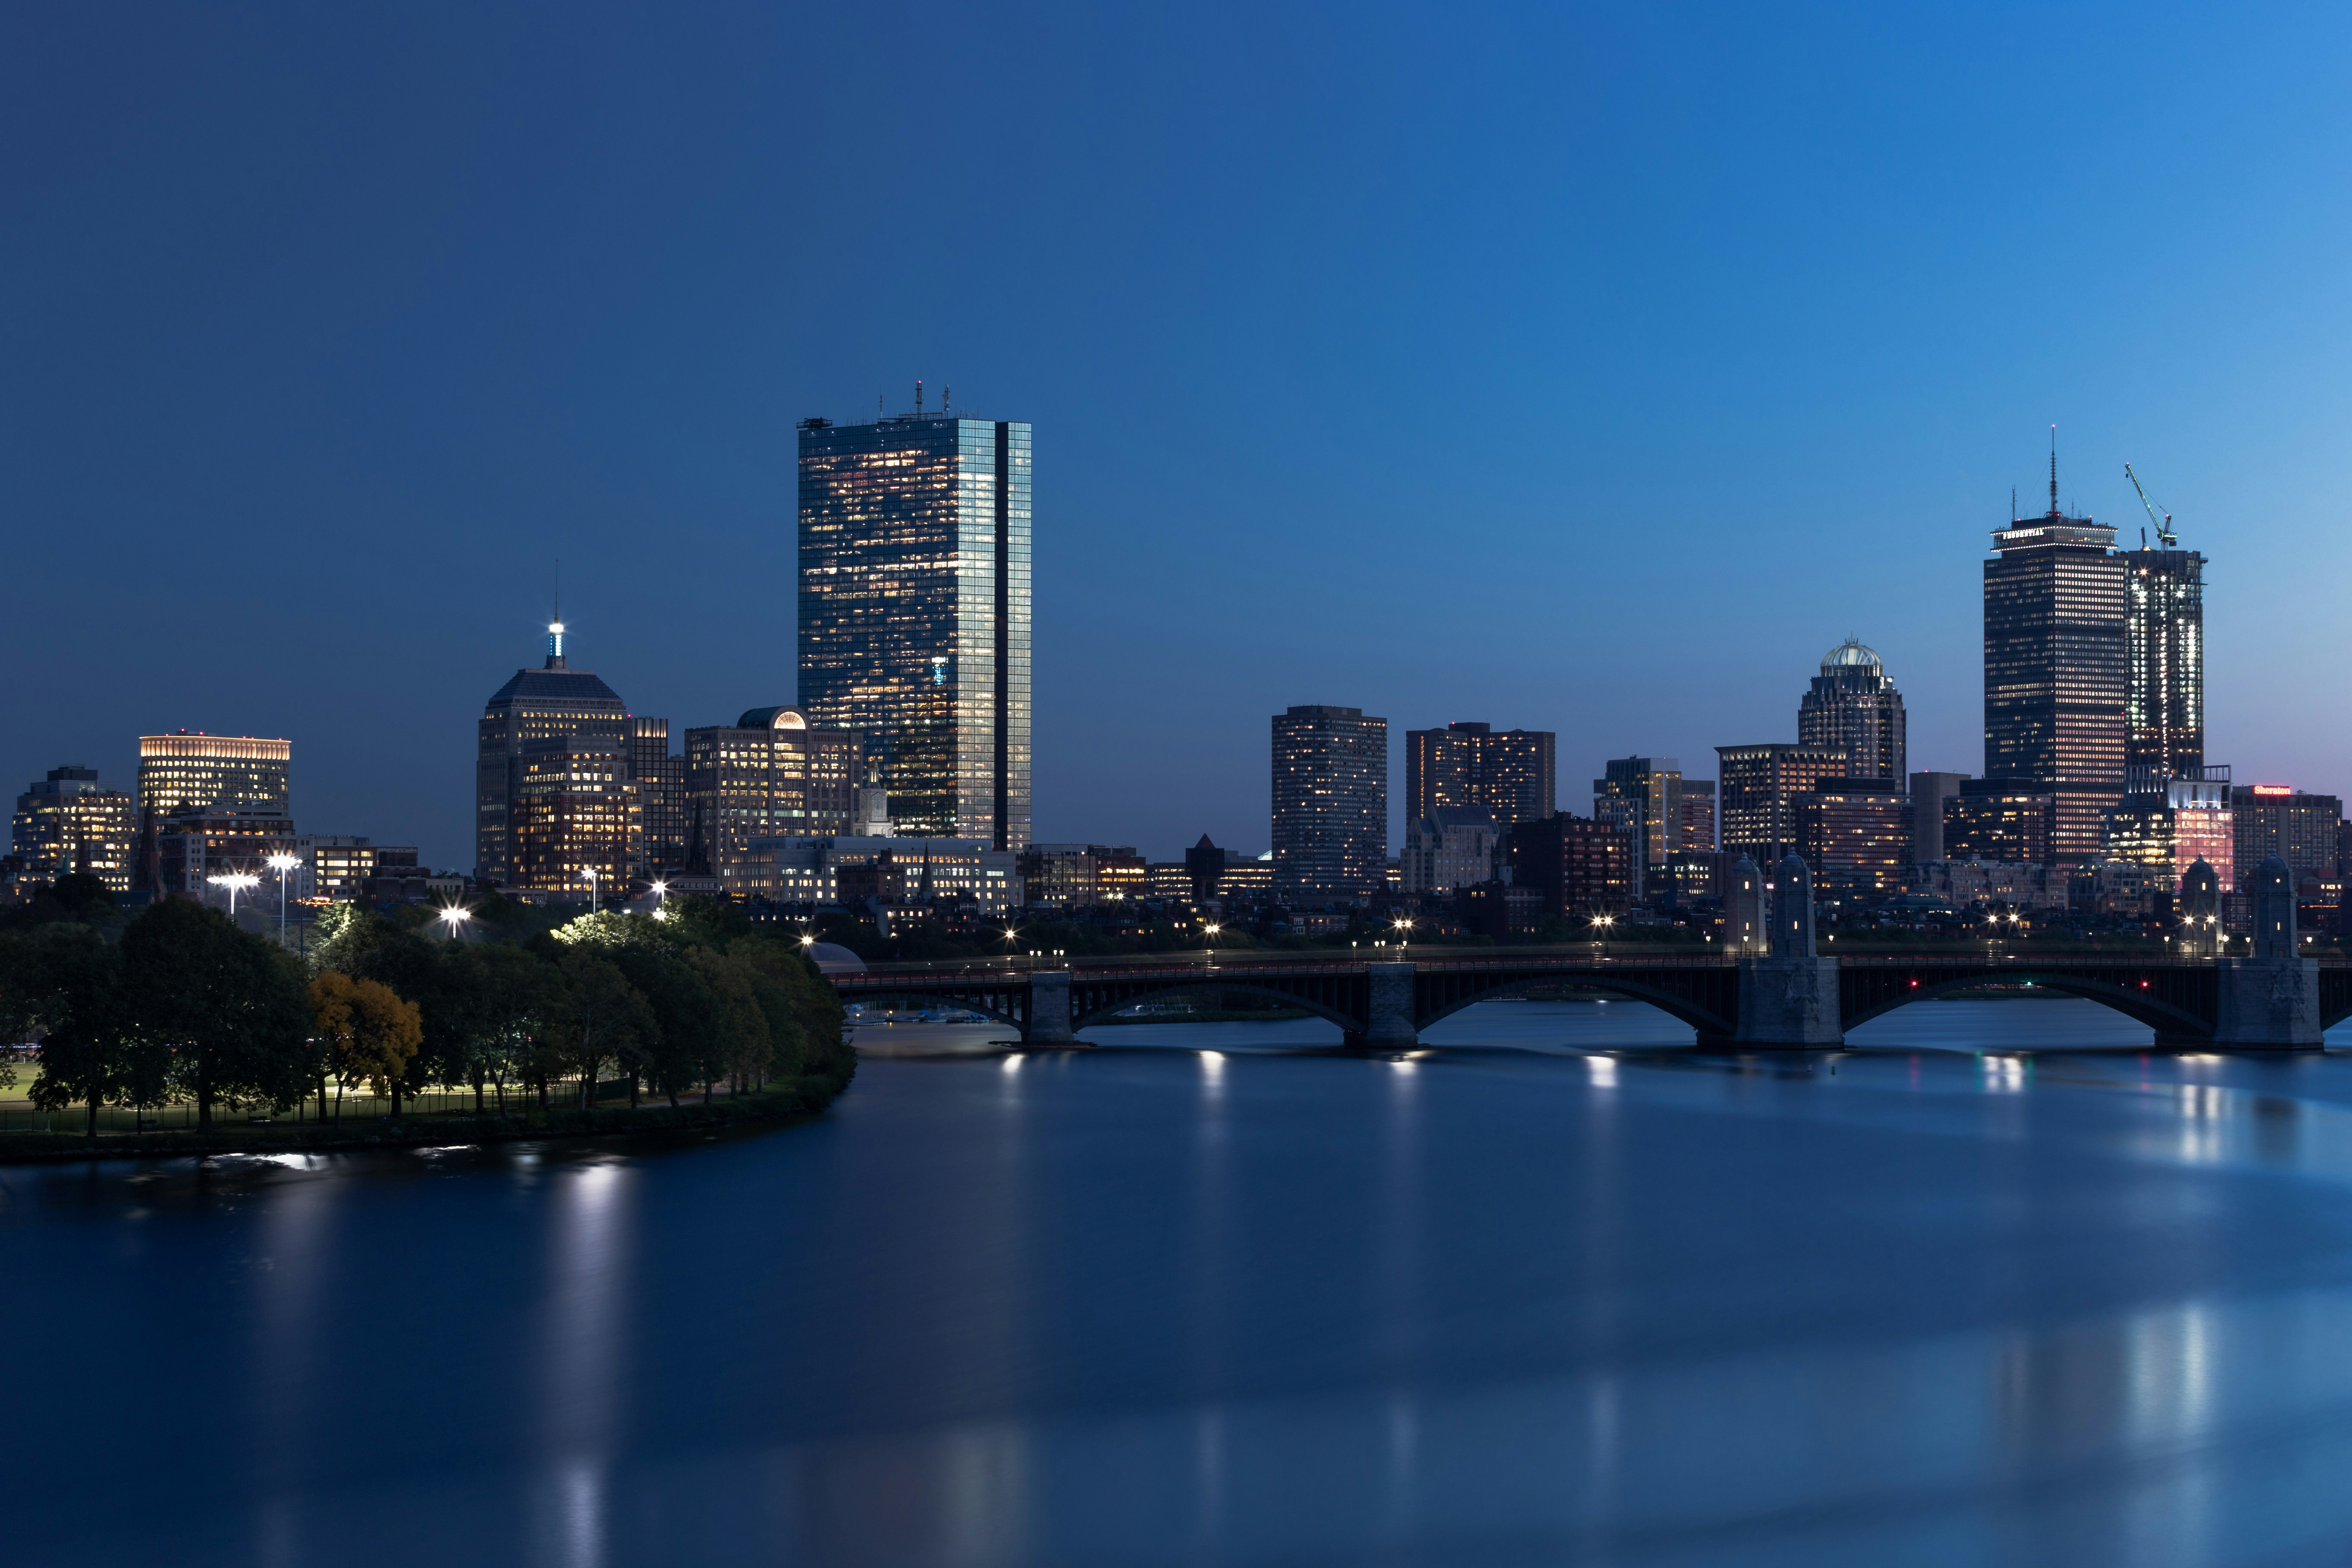

In [12]:
from IPython.display import Image

Image(filename=r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Images\Boston.jpg")

## **1. Problem Definition**

The first step is to establish a clear understanding of the challenge we aim to solve. This phase lays the groundwork for the entire project and ensures all subsequent efforts remain aligned with the primary objective.

### Objective
Predict the **sale price of residential properties** based on various features such as location, square footage, number of rooms, age of the house, neighborhood characteristics, and engineered features derived from the dataset.

### Scope
The analysis focuses on the provided housing dataset. Predictions are restricted to the homes listed in this dataset, without incorporating external data sources (e.g., market trends, interest rates) unless explicitly integrated.

### Stakeholders
- **Real Estate Analysts / Agencies**: Support accurate property valuations and market insights.  
- **Home Buyers & Sellers**: Estimate fair pricing and make better-informed decisions.  
- **Data Scientists / ML Practitioners**: Refine skills in regression modeling, feature engineering, and evaluation metrics.  
- **Business Decision Makers**: Integrate predictive insights into pricing strategies.

### Success Criteria
Achieve **low error rates** in predicting housing prices, evaluated using metrics such as **Root Mean Squared Error (RMSE)**, **Mean Absolute Error (MAE)**, and **R² score**. A successful model delivers predictions that closely approximate true market values, making it both reliable and practical for real-world use.

> A precisely defined problem is the foundation of an accurate solution!

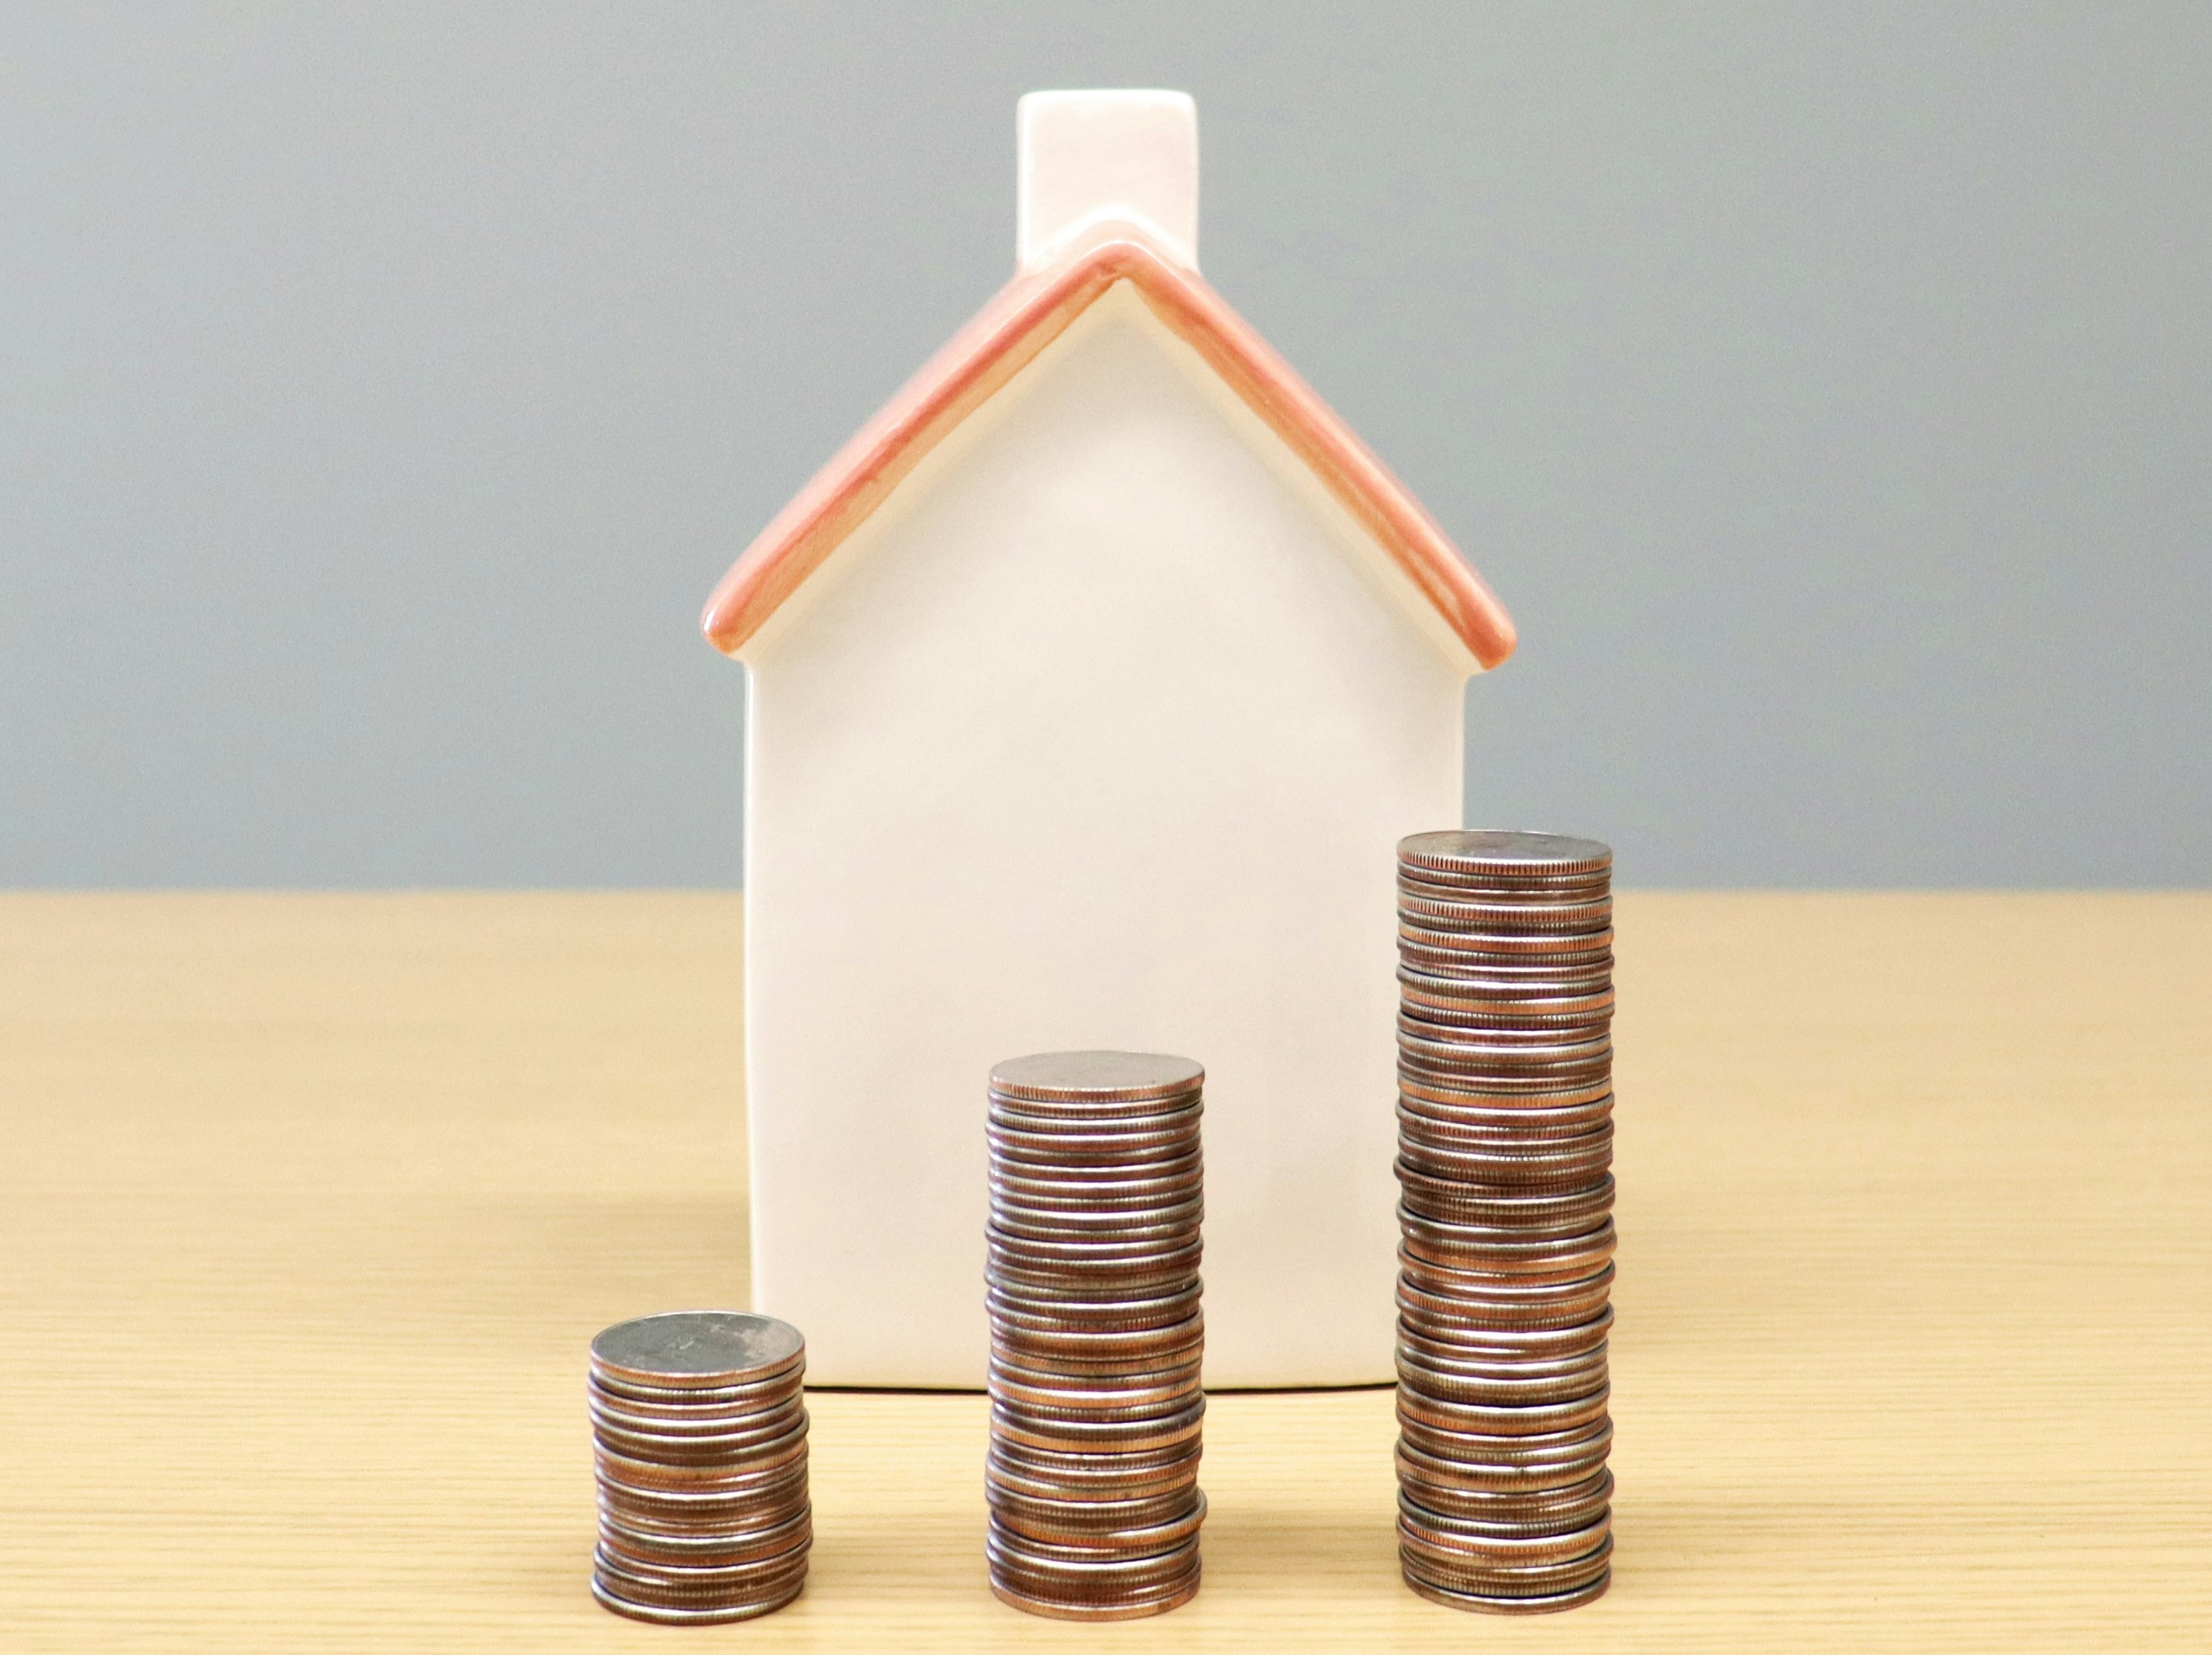

In [13]:
Image(filename=r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Images\Price_prediction.jpg")

## **2. Data Collection**

The **Data Collection** phase focuses on acquiring the datasets necessary for building the predictive model and setting up the environment for efficient analysis. This step also involves importing essential libraries and creating reusable functions to streamline the workflow.

For this project, the housing datasets include both training and testing data containing property features such as location, size, number of rooms, year built, and other relevant attributes.

You can access the datasets through the following sources:

- **1.** Download directly from my GitHub: [https://github.com/saricmilos/housing-price-prediction](https://github.com/saricmilos/housing-price-prediction)

- **2.** Access publicly available housing datasets on Kaggle: [Housing Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Both sources provide the same dataset, so you can use whichever is most convenient for your workflow.

### Required Libraries Import

In [14]:
from src.eda import plot_missing_values_heatmap,plot_missing_values_barchart, plot_number_of_unique_values, plot_categorical_values_distributions, get_column_types, get_missing_value_summary

In [15]:
from src.data_loader import load_all_csvs_from_folder
from pathlib import Path

In [16]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd

In [17]:
dataset_folder = Path(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Data")

# Option 1: Load all CSVs at once
datasets = load_all_csvs_from_folder(dataset_folder)
print(datasets.keys())
train_df = datasets.get("train")
test_df  = datasets.get("test")

dict_keys(['sample_submission', 'test', 'train'])


##  **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about **understanding the dataset**, uncovering patterns, spotting anomalies, and generating insights that will guide feature engineering and modeling.

In [18]:
datasets["train"].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [19]:
datasets["train"].describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [20]:
datasets["test"].describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [21]:
shapes = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "Shape": [datasets["train"].shape, datasets["test"].shape]
})
print(shapes.to_string(index=False))

 Dataset      Shape
Training (1460, 81)
    Test (1459, 80)


The train dataset contains 1460 rows and 81 columns.

The test dataset contains 1459 rows and 80 columns. Note that unlike the training dataset, it **does not include the target column `SalePrice`**, which we aim to predict using our model.

In [22]:
from IPython.display import display, HTML 

with open(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\housing-price-prediction\Data\data_description.txt", "r") as f:
    content = f.read()

# Display the entire text inside a scrollable block
display(HTML(f"<pre style='max-height:500px;overflow:auto'>{content}</pre>"))

In [23]:
# Now run info() or just display the DataFrame
datasets["train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## **3.1. Missing Values**

### **3.1.1 Training Set**

In [24]:
na_counts_train = datasets["train"].isna().sum().reset_index()
na_counts_train.columns = ['Feature', 'MissingValues']

In [25]:
na_counts_train

Feature  MissingValues
0              Id              0
1      MSSubClass              0
2        MSZoning              0
3     LotFrontage            259
4         LotArea              0
..            ...            ...
76         MoSold              0
77         YrSold              0
78       SaleType              0
79  SaleCondition              0
80      SalePrice              0

[81 rows x 2 columns]

In [26]:
summary_nan_train = get_missing_value_summary(datasets["train"])

In [27]:
print(
    summary_nan_train[summary_nan_train["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
      PoolQC  object         1460           1453                 7       99.520548
 MiscFeature  object         1460           1406                54       96.301370
       Alley  object         1460           1369                91       93.767123
       Fence  object         1460           1179               281       80.753425
  MasVnrType  object         1460            872               588       59.726027
 FireplaceQu  object         1460            690               770       47.260274
 LotFrontage float64         1460            259              1201       17.739726
  GarageType  object         1460             81              1379        5.547945
 GarageYrBlt float64         1460             81              1379        5.547945
GarageFinish  object         1460             81              1379        5.547945
  GarageQual  object         1460             81              1379        5.547945
  Ga

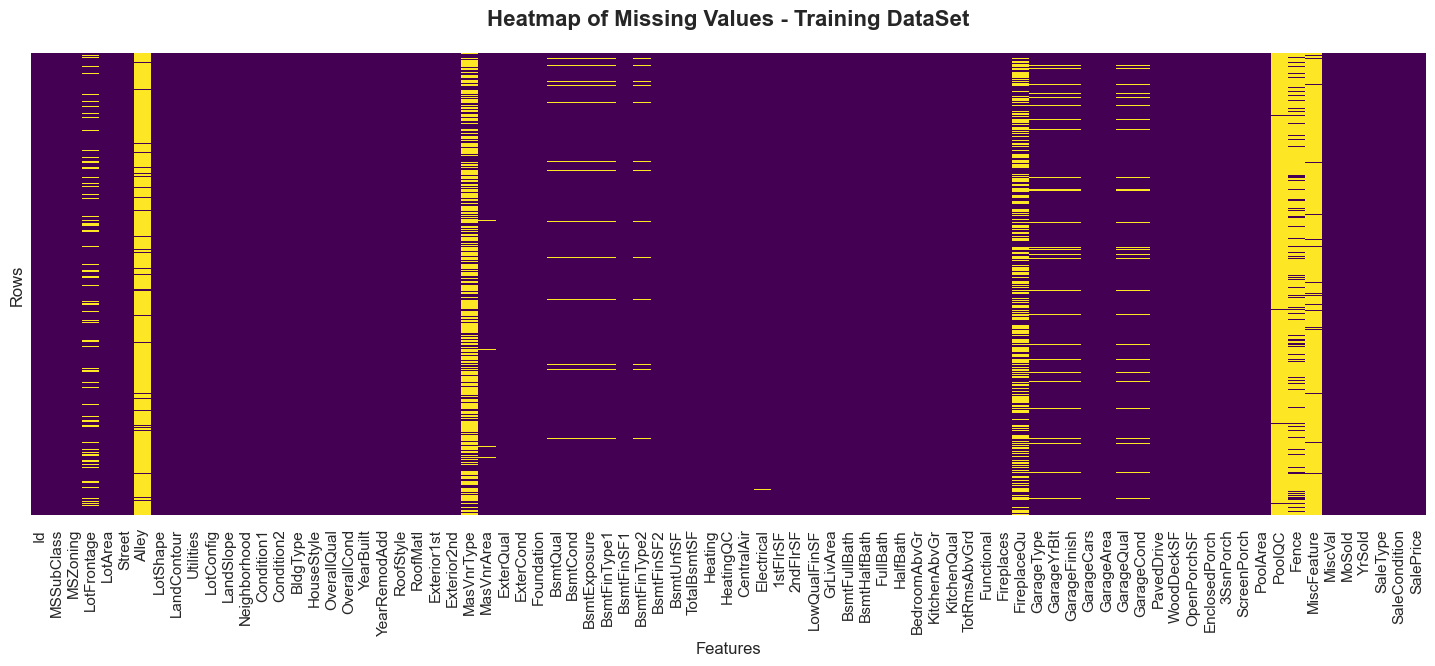

In [28]:
plot_missing_values_heatmap(datasets["train"], "Training DataSet")

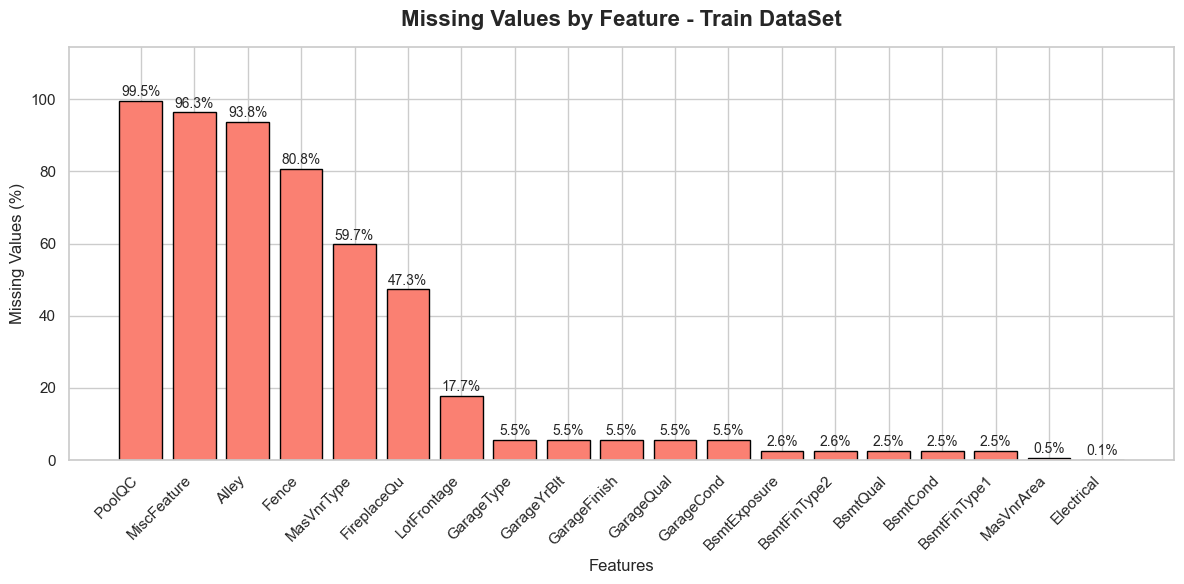

In [29]:
plot_missing_values_barchart(datasets["train"],"Train DataSet")

In [30]:
cat_cols_train, int_cols_train, float_cols_train = get_column_types(datasets["train"])

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'E

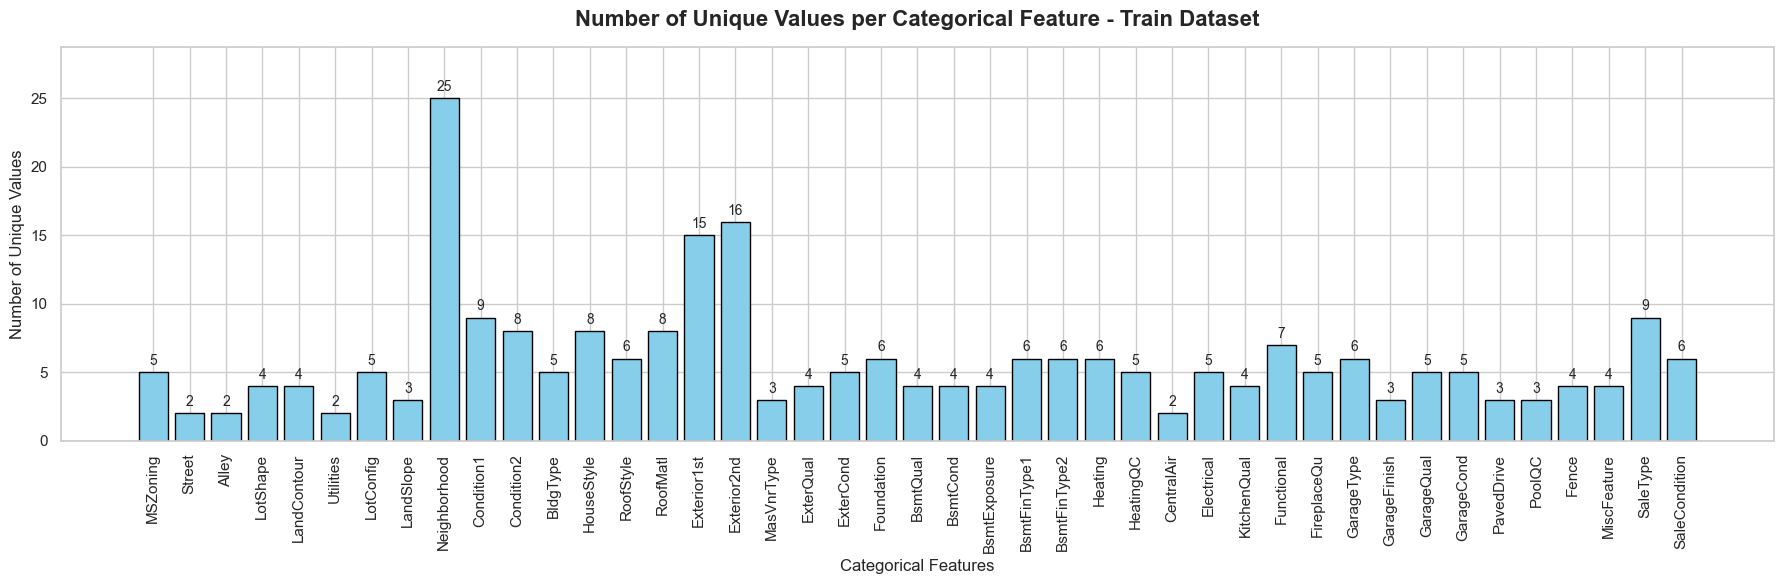

In [31]:
plot_number_of_unique_values(datasets["train"],cat_cols_train,"Train Dataset")

In [32]:
# Loop through categorical columns
for col in cat_cols_train:
    train_unique = set(datasets["train"][col].dropna().unique())
    test_unique = set(datasets["test"][col].dropna().unique())
    
    # Find differences
    only_in_train = train_unique - test_unique
    only_in_test = test_unique - train_unique
    
    if only_in_train or only_in_test:  # Print only if there are differences
        print(f"Column: {col}")
        if only_in_train:
            print(f"  Only in train: {only_in_train}")
        if only_in_test:
            print(f"  Only in test: {only_in_test}")
        print("-"*50)

Column: Utilities
  Only in train: {'NoSeWa'}
--------------------------------------------------
Column: Condition2
  Only in train: {'RRNn', 'RRAe', 'RRAn'}
--------------------------------------------------
Column: HouseStyle
  Only in train: {'2.5Fin'}
--------------------------------------------------
Column: RoofMatl
  Only in train: {'Membran', 'ClyTile', 'Metal', 'Roll'}
--------------------------------------------------
Column: Exterior1st
  Only in train: {'Stone', 'ImStucc'}
--------------------------------------------------
Column: Exterior2nd
  Only in train: {'Other'}
--------------------------------------------------
Column: Heating
  Only in train: {'OthW', 'Floor'}
--------------------------------------------------
Column: Electrical
  Only in train: {'Mix'}
--------------------------------------------------
Column: GarageQual
  Only in train: {'Ex'}
--------------------------------------------------
Column: PoolQC
  Only in train: {'Fa'}
-------------------------------

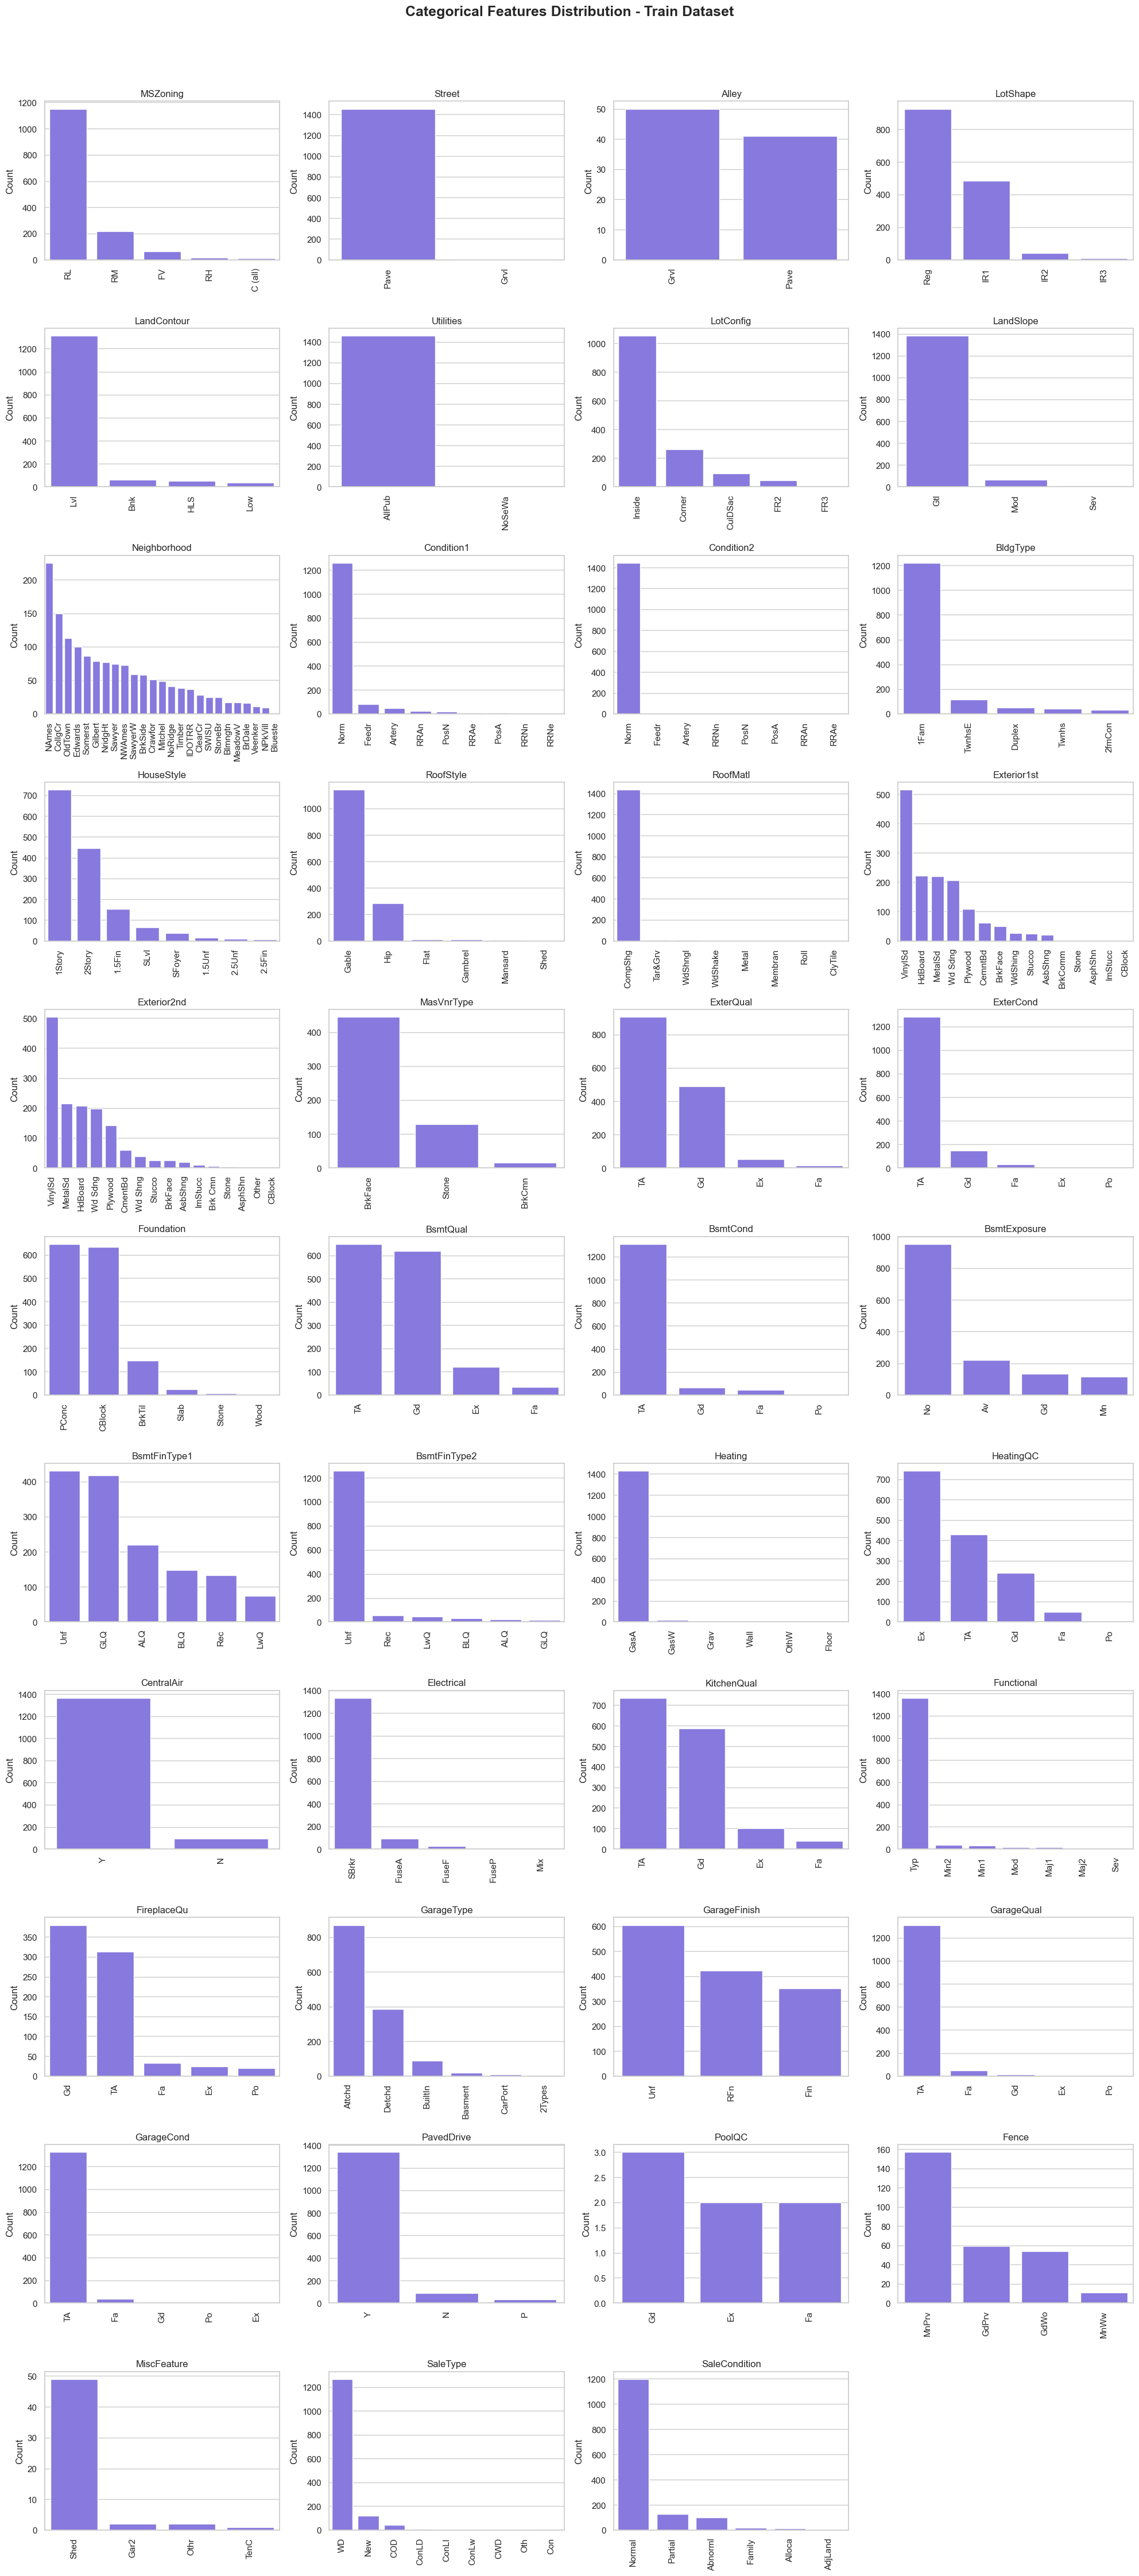

In [33]:
plot_categorical_values_distributions(datasets["train"],cat_cols_train,"Train Dataset")

### **3.1.2. Test Set**

In [34]:
na_counts_test = datasets["train"].isna().sum().reset_index()
na_counts_test.columns = ['Feature', 'MissingValues']

In [35]:
na_counts_test

Feature  MissingValues
0              Id              0
1      MSSubClass              0
2        MSZoning              0
3     LotFrontage            259
4         LotArea              0
..            ...            ...
76         MoSold              0
77         YrSold              0
78       SaleType              0
79  SaleCondition              0
80      SalePrice              0

[81 rows x 2 columns]

In [36]:
summary_nan_test = get_missing_value_summary(datasets["test"])

In [37]:
print(
    summary_nan_test[summary_nan_test["MissingValues"] > 0]
    .sort_values("MissingValues", ascending=False)
    .to_string(index=False)
)

      Column   Dtype  TotalValues  MissingValues  NonMissingValues  MissingPercent
      PoolQC  object         1459           1456                 3       99.794380
 MiscFeature  object         1459           1408                51       96.504455
       Alley  object         1459           1352               107       92.666210
       Fence  object         1459           1169               290       80.123372
  MasVnrType  object         1459            894               565       61.274846
 FireplaceQu  object         1459            730               729       50.034270
 LotFrontage float64         1459            227              1232       15.558602
  GarageQual  object         1459             78              1381        5.346127
  GarageCond  object         1459             78              1381        5.346127
 GarageYrBlt float64         1459             78              1381        5.346127
GarageFinish  object         1459             78              1381        5.346127
  Ga

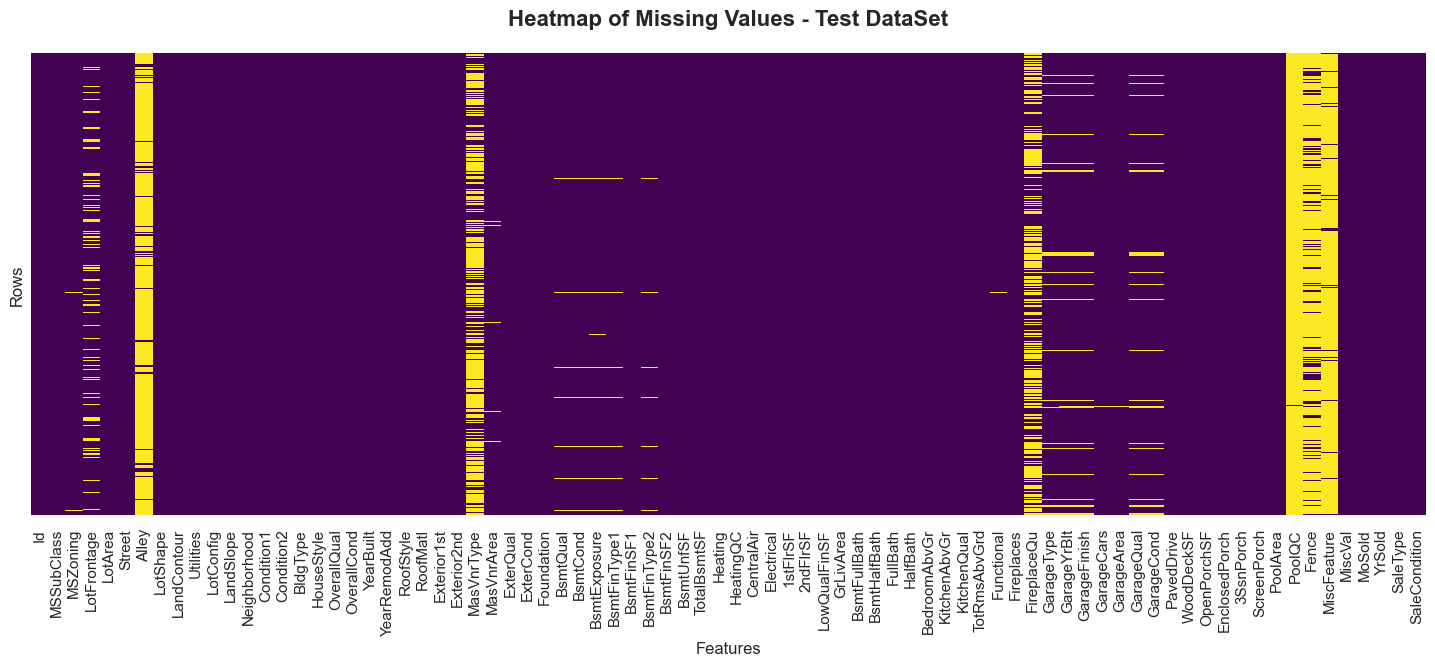

In [38]:
plot_missing_values_heatmap(datasets["test"], "Test DataSet")

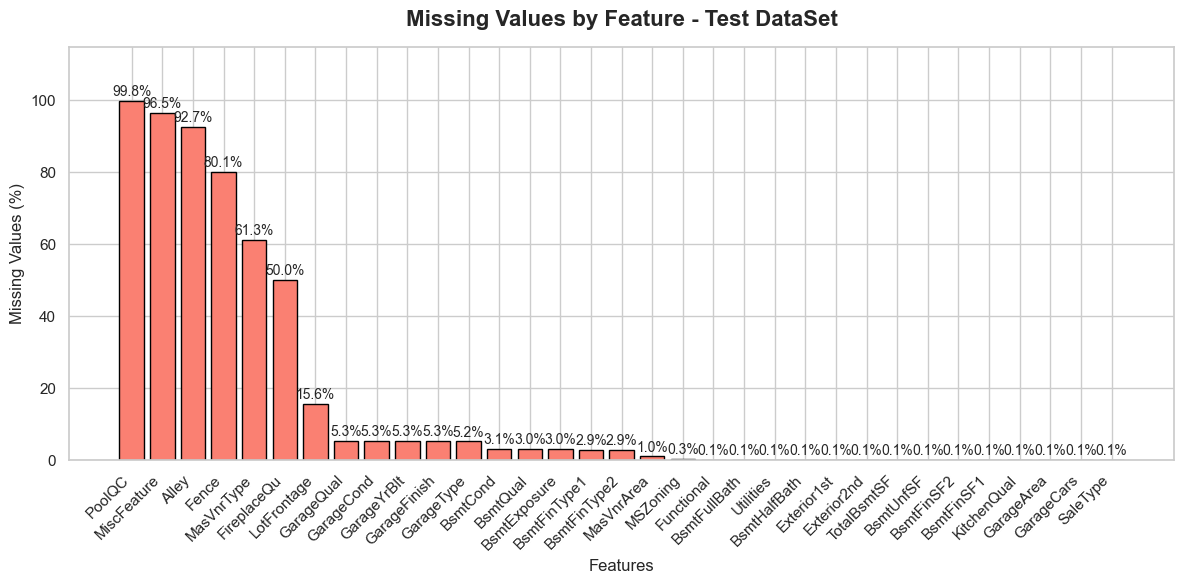

In [39]:
plot_missing_values_barchart(datasets["test"],"Test DataSet")

In [40]:
cat_cols_test, int_cols_test, float_cols_test = get_column_types(datasets["test"])

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Real (float) variables:
['Lot

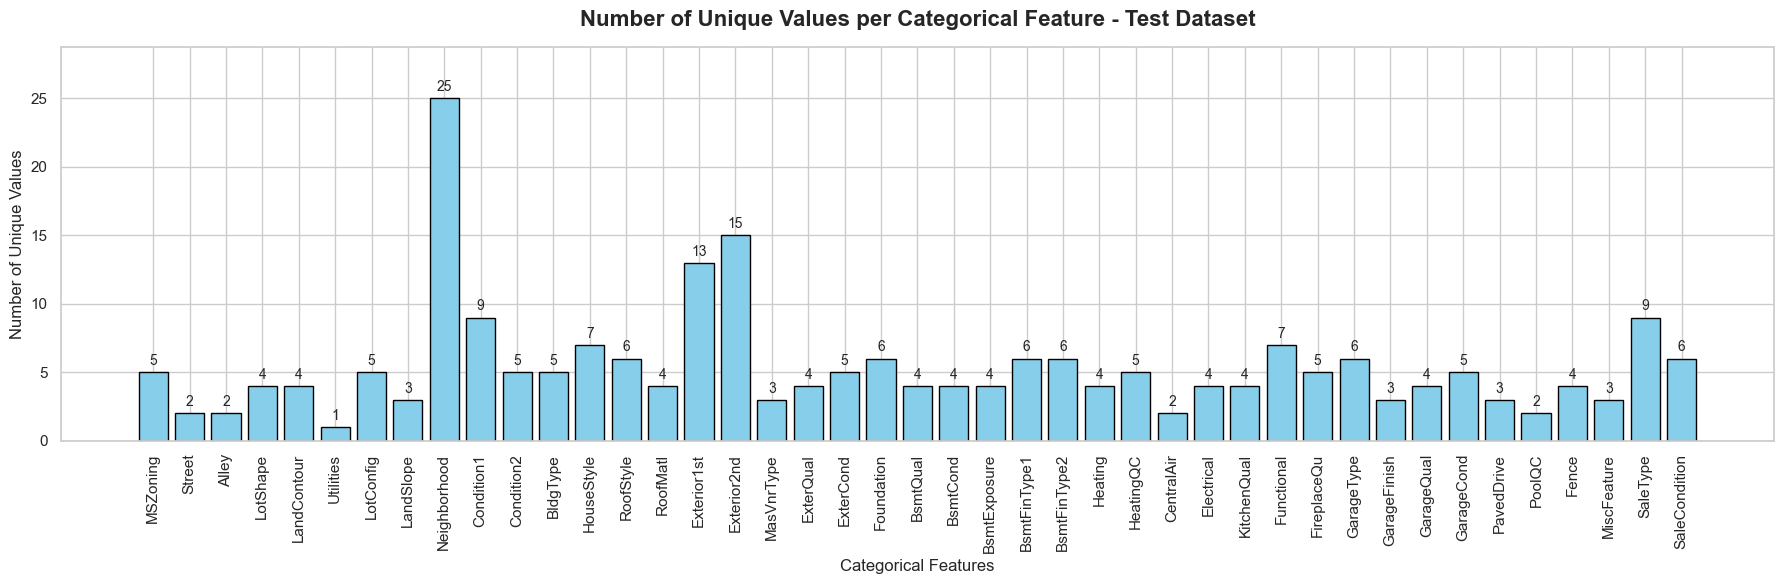

In [41]:
plot_number_of_unique_values(datasets["test"],cat_cols_test,"Test Dataset")

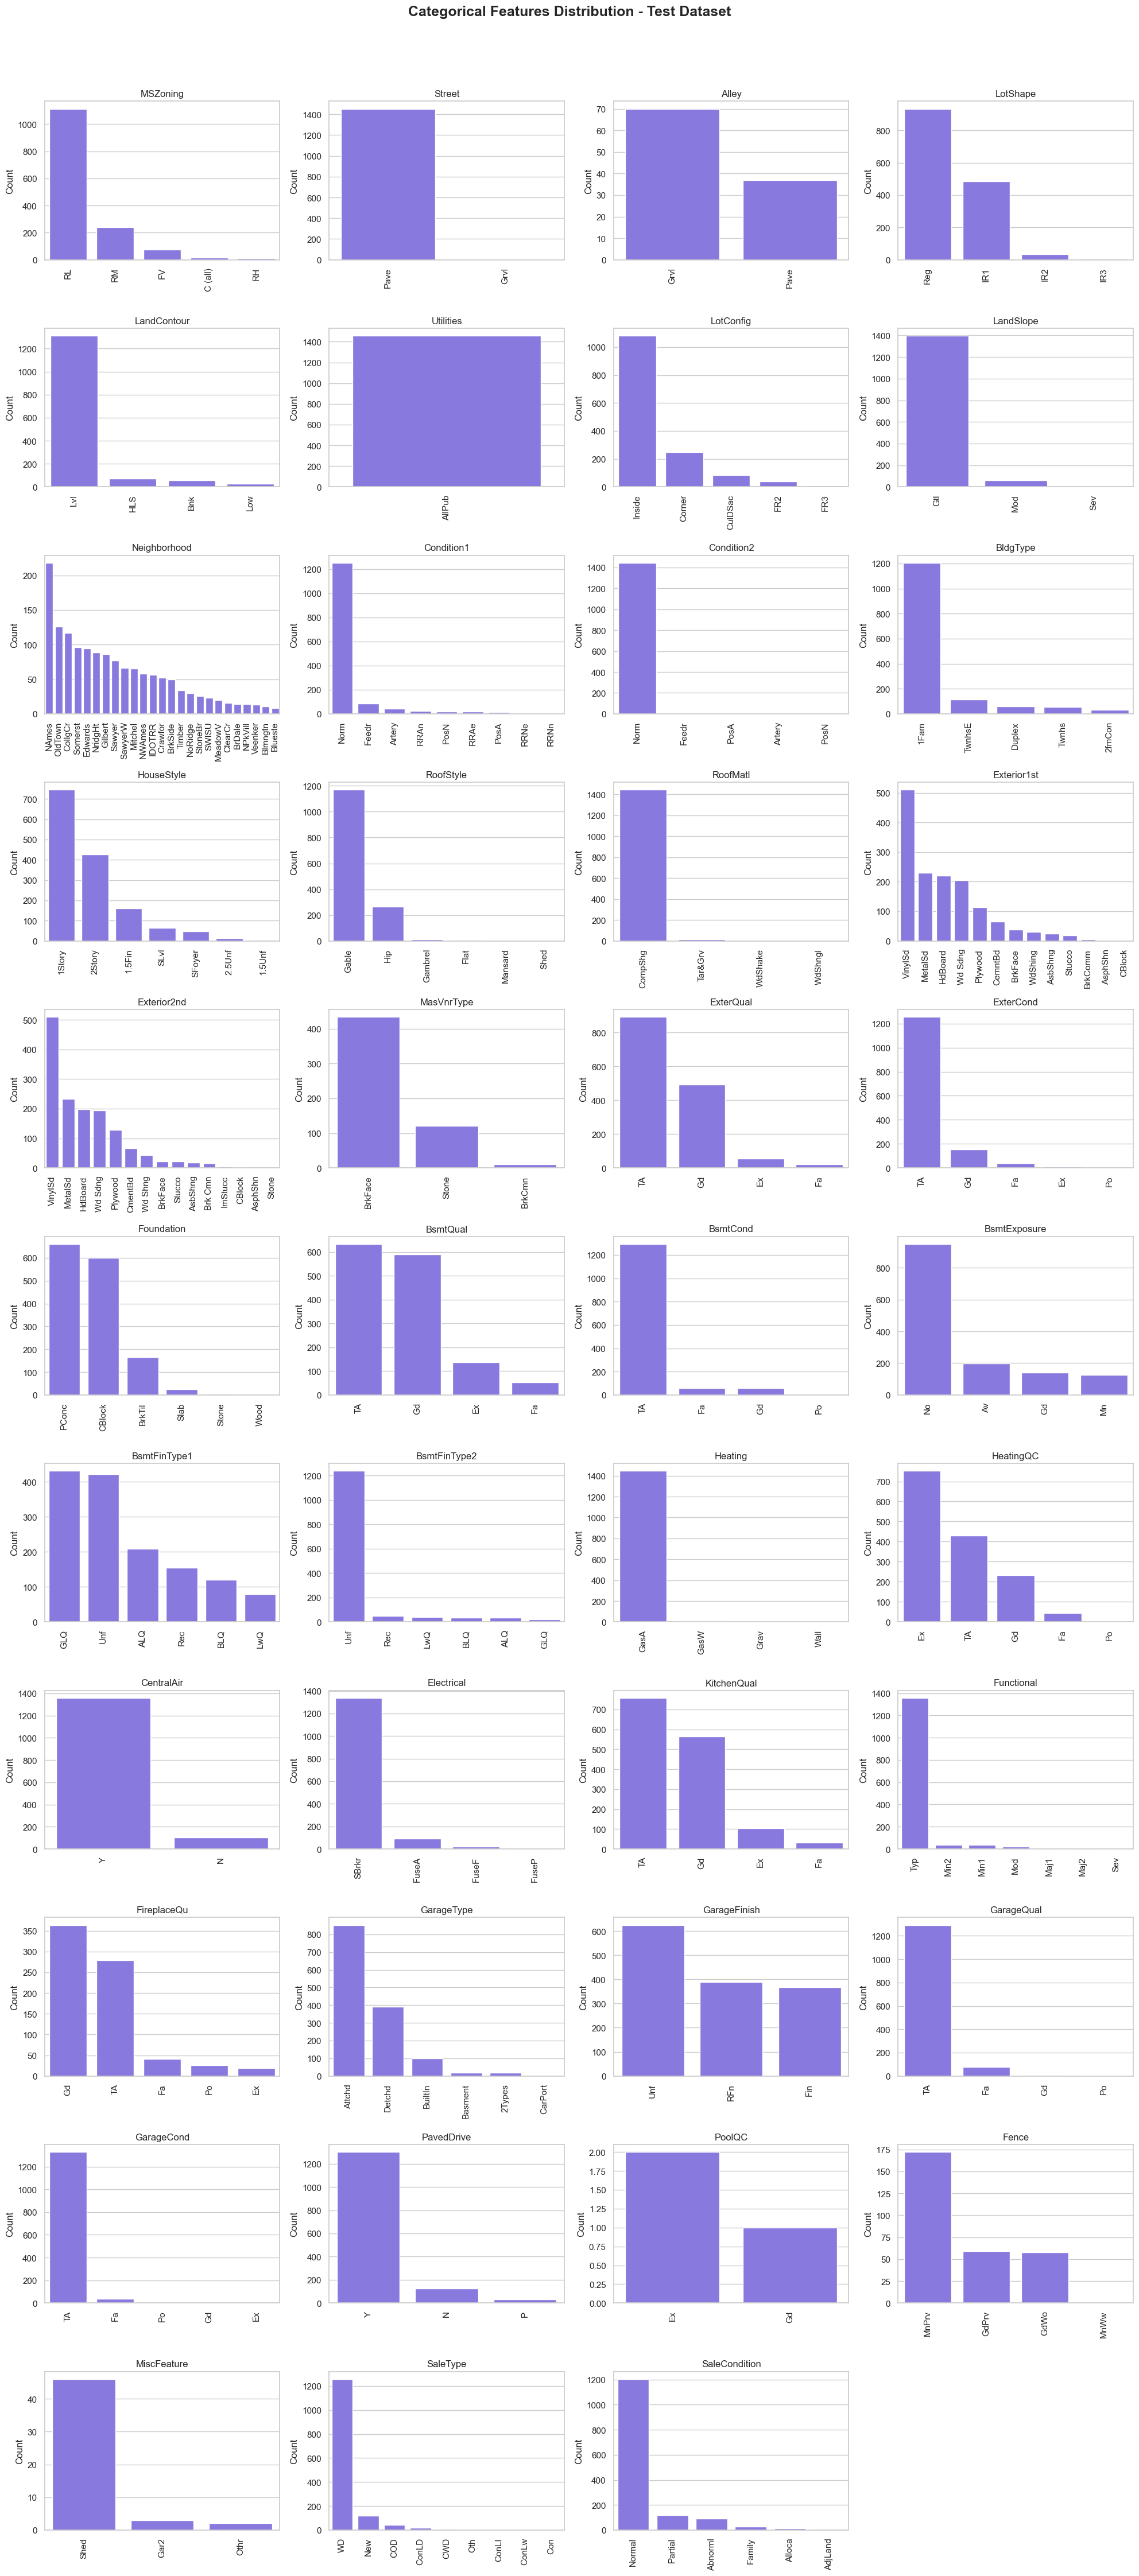

In [42]:
plot_categorical_values_distributions(datasets["test"],cat_cols_test,"Test Dataset")

## **4. Model Evaluation and Testing**

After training and selecting the best model(s), it is essential to **evaluate their performance** and **validate predictions**. This step helps ensure that our model generalizes well to unseen data.

Key tasks in this phase include:

- **Training Set Performance**: Checking how well the model fits the training data.
- **Test Set Predictions**: Using the model to predict outcomes on the test set.
- **Visual Evaluation**: Plotting actual vs predicted values to detect overfitting or underfitting.
- **Metric Reporting**: Calculating evaluation metrics such as RMSE, MAE, or R².
- **Submission Preparation**: Generating a CSV file with predictions for competition or deployment purposes.

In [43]:
from src.preprocess import Preprocessor

pre = Preprocessor()

# Training data (drop target at the end)
train_processed = pre.fit_transform(train_df, target_col="SalePrice")
X_train = train_processed.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

# Test data
X_test = pre.transform(test_df)

In [44]:
# Load best model
final_model = joblib.load("models/XGB_best_model.pkl")

# Now you can use it for predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

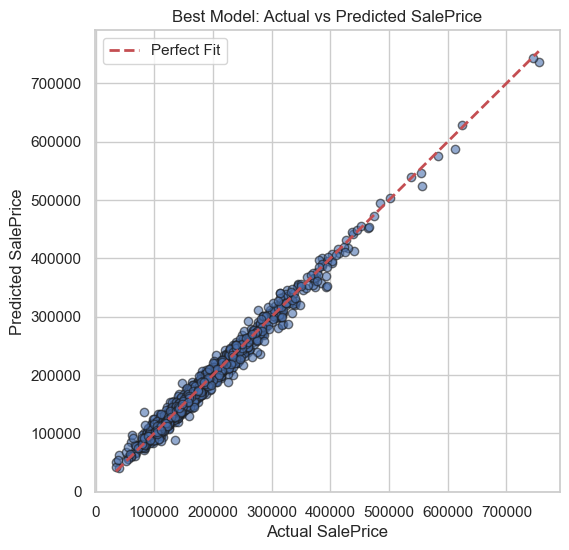

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train, alpha=0.6, edgecolor="k")
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Best Model: Actual vs Predicted SalePrice")
plt.legend()
plt.show()

In [46]:
# Make predictions on test set
y_pred_test = final_model.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "Id": test_df["Id"],       # make sure test_df has the 'Id' column
    "SalePrice": y_pred_test
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

print("Submission CSV saved as submission.csv")

Submission CSV saved as submission.csv


## Conclusion

The dataset has been thoroughly processed and analyzed. Multiple models were trained and evaluated, allowing us to identify the best-performing model. The workflow ensures reproducibility, and the selected model is ready for generating predictions and submission. This pipeline can be further refined as new features or techniques are explored.